In [1]:
import pandas as pd
import numpy as np
from plot_cdf import plot_cdf, plot_cdf_multiple
import matplotlib.pyplot as plt
import json
import os
import glob

## Check capacities of traces

In [9]:
trace_dir = os.path.join("..", "gym_folder", "alphartc_gym", "tests", "data")
trace_set = glob.glob(f'{trace_dir}/**/*.json', recursive=True)
print(trace_set)

['../gym_folder/alphartc_gym/tests/data/WIRED_900kbs.json', '../gym_folder/alphartc_gym/tests/data/4G_500kbps.json', '../gym_folder/alphartc_gym/tests/data/trace_300k.json', '../gym_folder/alphartc_gym/tests/data/trace_example.json', '../gym_folder/alphartc_gym/tests/data/4G_3mbps.json', '../gym_folder/alphartc_gym/tests/data/5G_13mbps.json', '../gym_folder/alphartc_gym/tests/data/WIRED_200kbps.json', '../gym_folder/alphartc_gym/tests/data/4G_700kbps.json', '../gym_folder/alphartc_gym/tests/data/WIRED_35mbps.json', '../gym_folder/alphartc_gym/tests/data/5G_12mbps.json', '../gym_folder/alphartc_gym/tests/data/rtt/trace_rtt_600.json', '../gym_folder/alphartc_gym/tests/data/rtt/trace_rtt_400.json', '../gym_folder/alphartc_gym/tests/data/rtt/trace_rtt_pattern_4.json', '../gym_folder/alphartc_gym/tests/data/rtt/trace_rtt_pattern_2.json', '../gym_folder/alphartc_gym/tests/data/rtt/trace_rtt_pattern_3.json', '../gym_folder/alphartc_gym/tests/data/rtt/trace_rtt_200.json', '../gym_folder/alphar

WIRED_900kbs.json


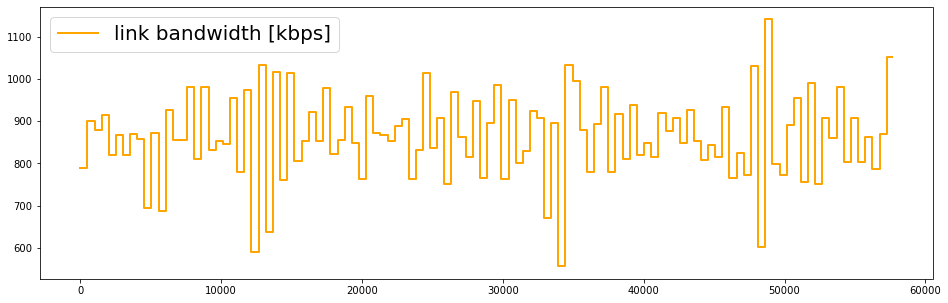

4G_500kbps.json


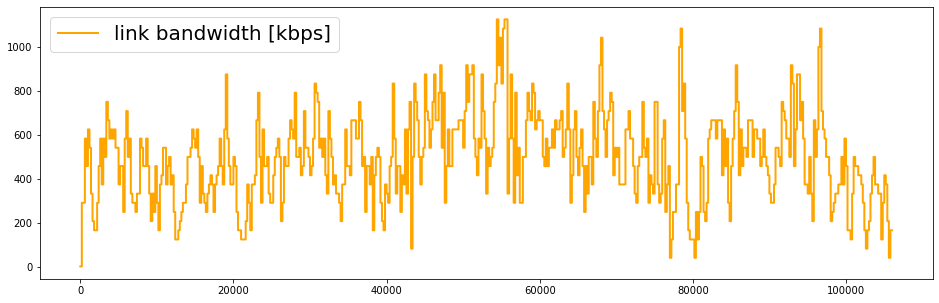

trace_300k.json


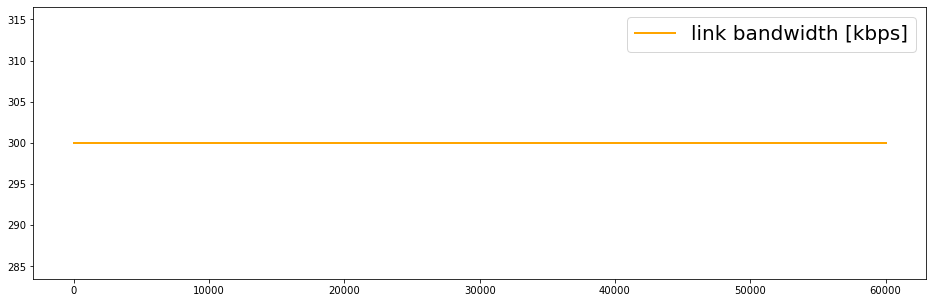

trace_example.json


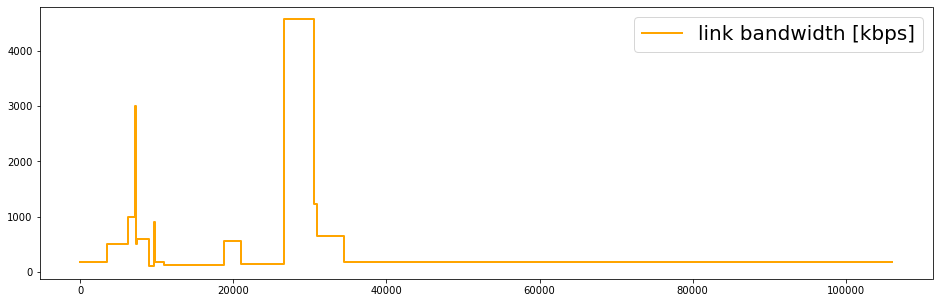

4G_3mbps.json


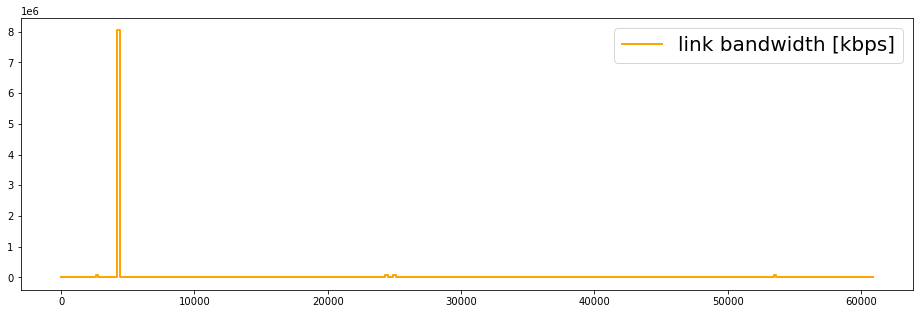

5G_13mbps.json


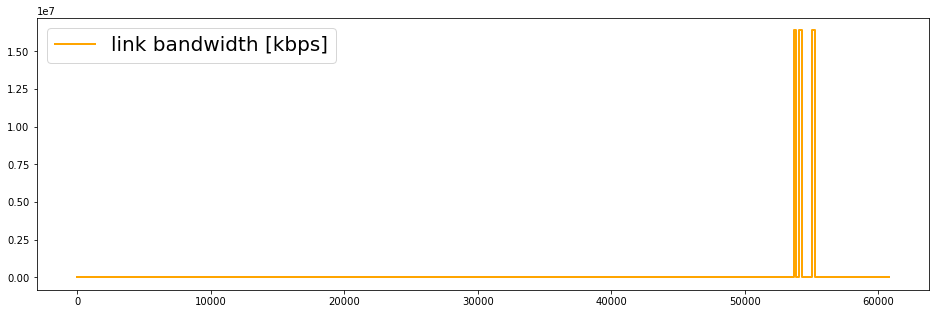

WIRED_200kbps.json


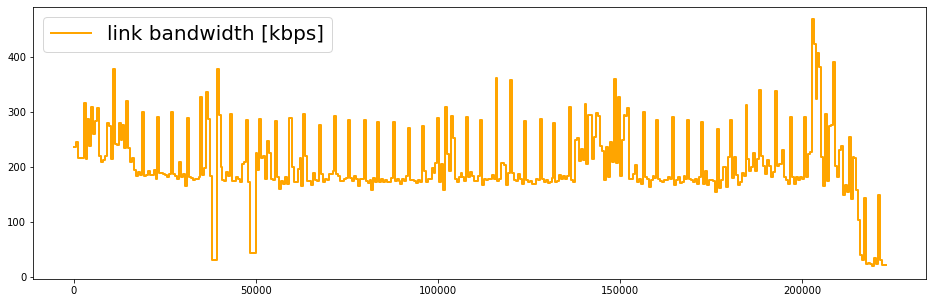

4G_700kbps.json


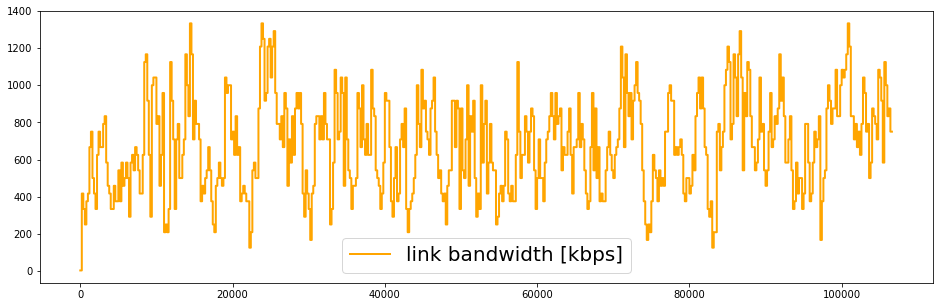

WIRED_35mbps.json


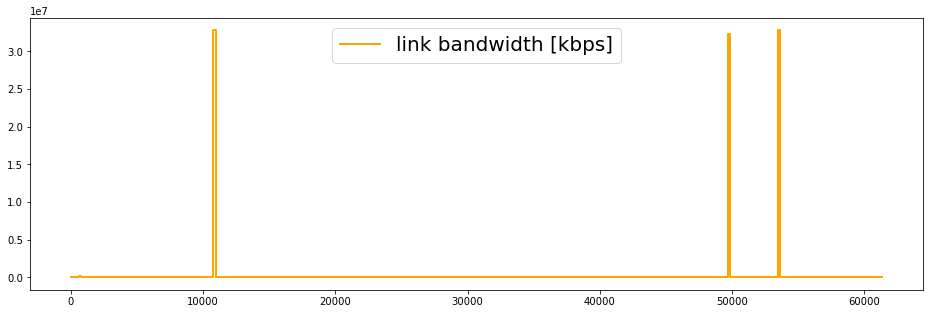

5G_12mbps.json


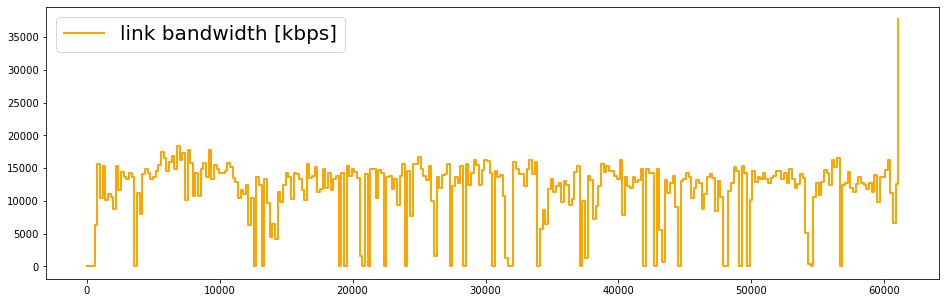

trace_rtt_600.json


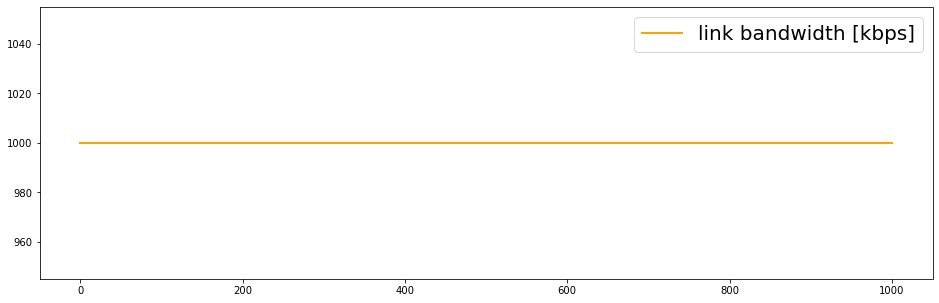

trace_rtt_400.json


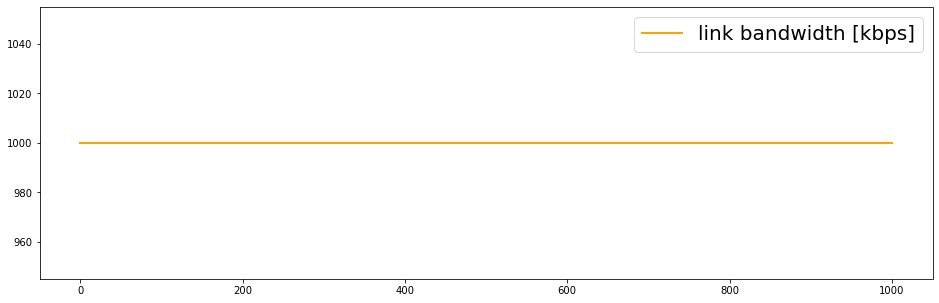

trace_rtt_pattern_4.json


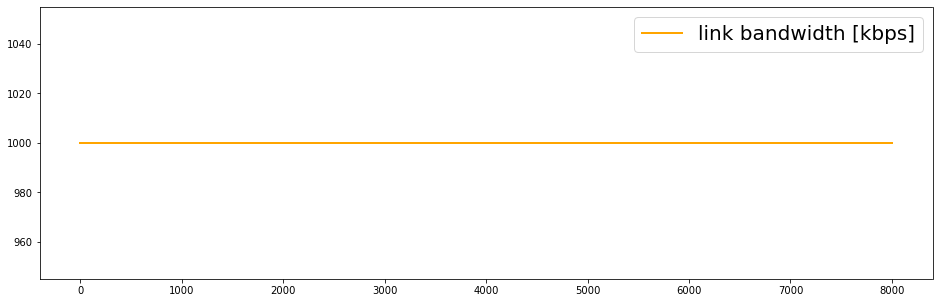

trace_rtt_pattern_2.json


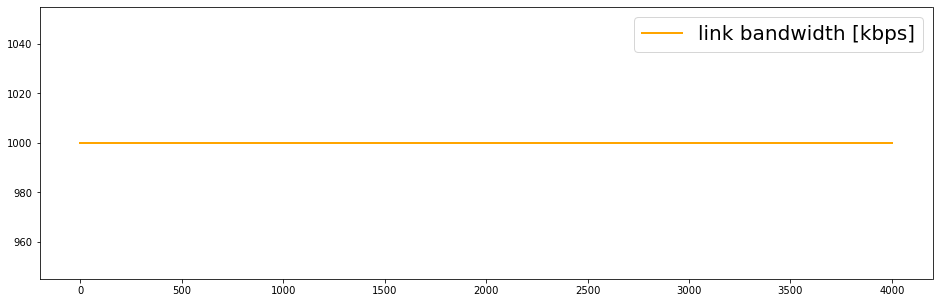

trace_rtt_pattern_3.json


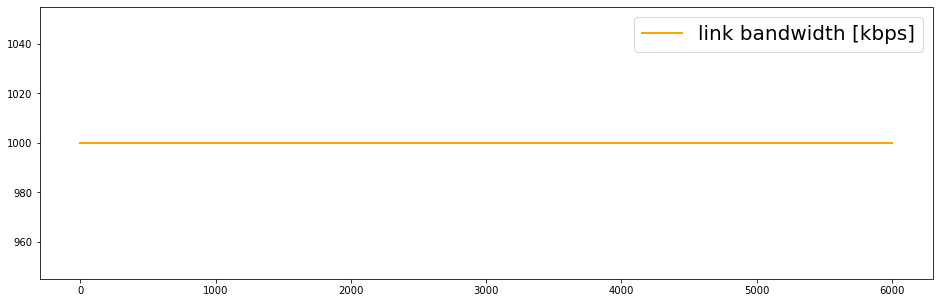

trace_rtt_200.json


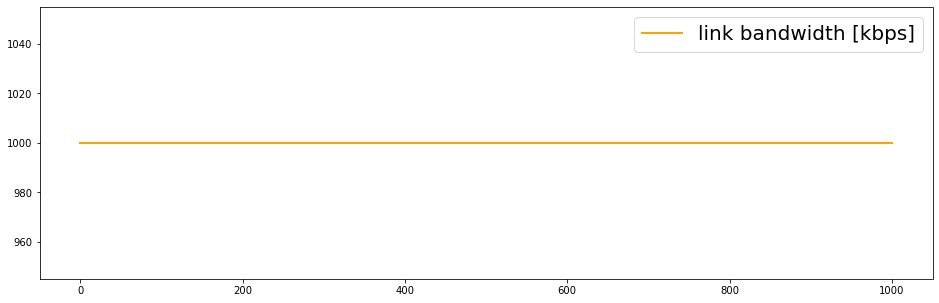

trace_loss_pattern_3.json


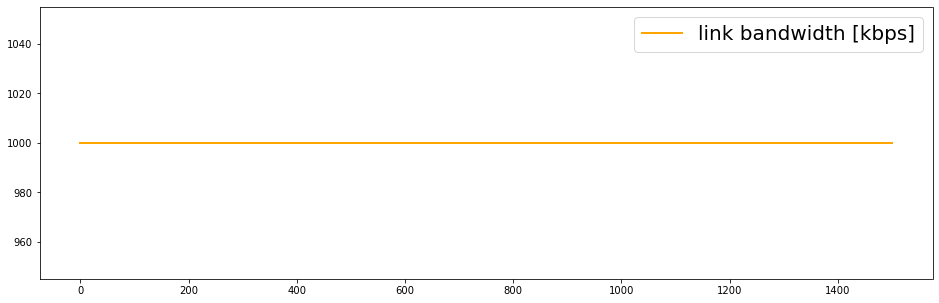

trace_loss_pattern_2.json


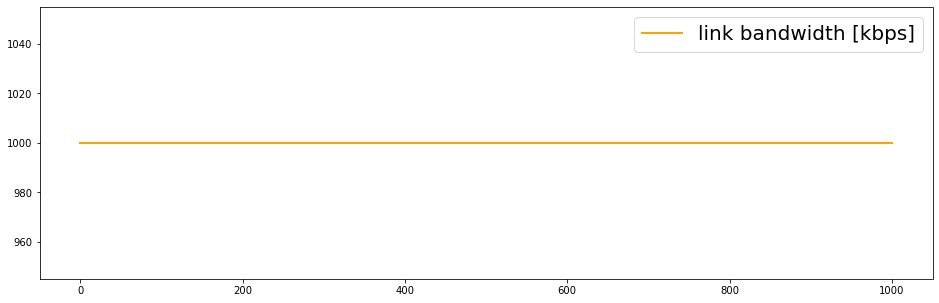

trace_loss_0dot5.json


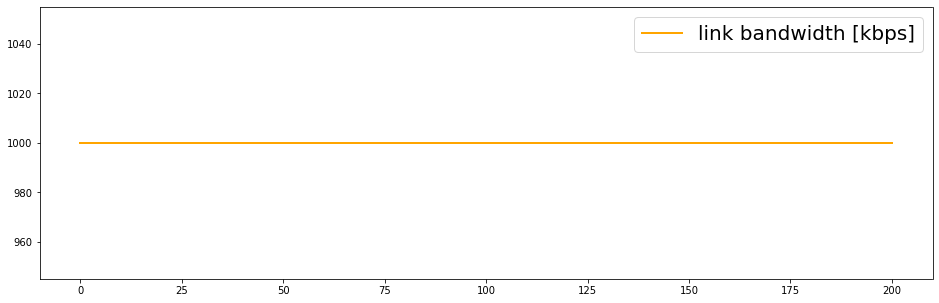

trace_loss_0.json


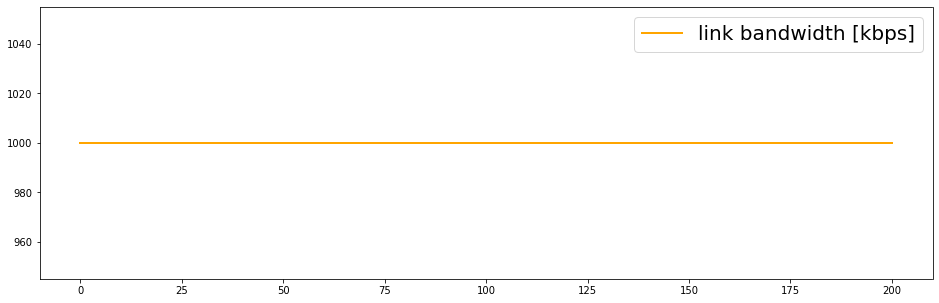

trace_loss_pattern_4.json


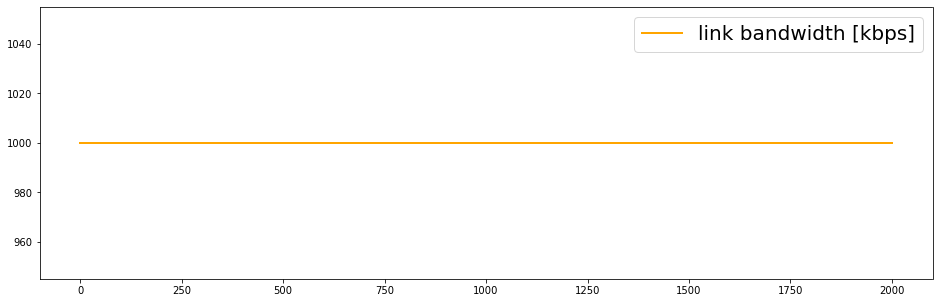

trace_loss_0dot1.json


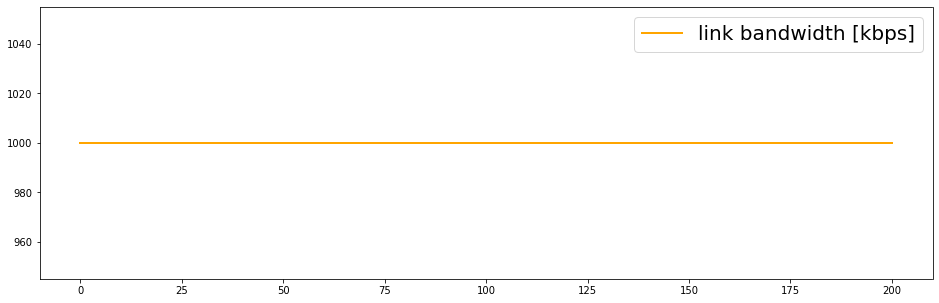

In [4]:
c = 0
for trace_name in trace_set:
    print(trace_name.split("/")[-1])

    with open(trace_name, "r") as f:
        d = json.load(f)

    df = pd.DataFrame(d["uplink"]["trace_pattern"])
    time = [0] + list(df["duration"].cumsum())
    capacities = [df["capacity"].iloc[0]] + list(df["capacity"])
#     print(df)
#     print(time)
    c+=1

    plt.figure(figsize=(16,5))
    plt.step(time, capacities, lw=2, label="link bandwidth [kbps]", color="orange")
    plt.legend(fontsize=20)
#     plt.ylim(0,1200)
    plt.show()

## Plot for poster

In [5]:
pickle_path = "/home/dena/Documents/Gym_RTC/gym-example/rates_delay_loss_poster3.pickle"
l_rate = pd.read_pickle(pickle_path)

In [6]:
#Define capacity
trace_name = l_rate[0]["trace"]
print(trace_name.split("/")[-1])

with open(trace_name, "r") as f:
    d = json.load(f)

df = pd.DataFrame(d["uplink"]["trace_pattern"])
time = [0] + list(df["duration"].cumsum())
capacities = [df["capacity"].iloc[0]] + list(df["capacity"])

4G_700kbps.json


In [7]:
time2 = np.arange(0,time[-1],500)
dff = pd.DataFrame(data=capacities, index=pd.Series(time).astype('datetime64[ms]'))
dff_capacity = dff.resample("500ms").mean()

4G_700kbps.json
sending_rate 58015.472
[ 10000.  20000.  30000.  40000.  50000.  60000.  70000.  80000.  90000.
 100000. 110000.]


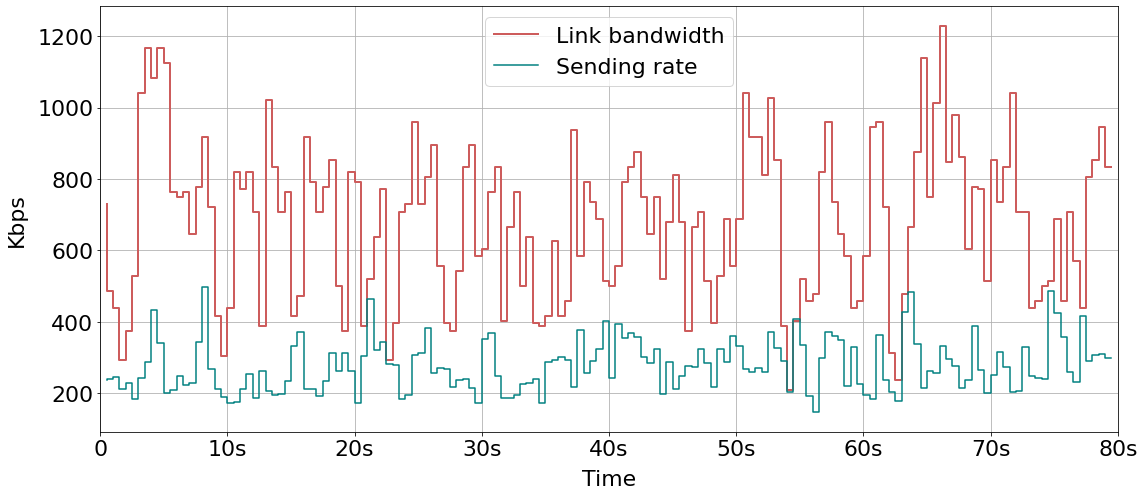

In [8]:
time_step = 500
colors = iter(["teal", "indianred", "olive", "red", "blue", "yellow", "black", "green"])
fontsize=22

# for i in range(len(l_rate)):
for i in [0]:
    
    #Define capacity
    trace_name = l_rate[i]["trace"]
    print(trace_name.split("/")[-1])

    with open(trace_name, "r") as f:
        d = json.load(f)

    df = pd.DataFrame(d["uplink"]["trace_pattern"])
    time = [0] + list(df["duration"].cumsum())
    capacities = [df["capacity"].iloc[0]] + list(df["capacity"]) 

    fig, ax = plt.subplots(figsize=(16,7))
    ax.step(time2[41:200], dff_capacity[41:200], lw=2, label="Link bandwidth", color="indianred")

    for metric in ["sending_rate"]:   

        df_rate = pd.DataFrame(l_rate[i][metric], columns=[metric])
        t = np.arange(len(df_rate))*time_step
        df_rate["time"] = t
        df_rate.set_index("time", inplace=True)
        
        print(metric, np.sum(df_rate[metric]/1000))
        
        ax.step(df_rate.index[41:200], (df_rate[metric]/1000)[41:200], label=f"Sending rate", color=next(colors))
        plt.ylabel("Kbps", fontsize=fontsize, labelpad=10)
        plt.xlabel("Time", fontsize=fontsize, labelpad=10)

#     plt.title("Sending vs. receiving rate", fontsize=16)
#     plt.step(time, capacities, lw=2, label="link bandwidth [kbps]", color="orange")
    
    print(ax.get_xticks())
    ax.set_xticklabels(["0","10s", "20s", "30s", "40s", "50s", "60s", "70s", "80s", "90s"],
                      fontsize=fontsize)
    plt.yticks(fontsize=fontsize)
#     plt.xticks(np.arange(10000, 120000, 10000), np.arange(10000, 120000, 10000) )
    plt.grid()
    
    plt.legend(fontsize=fontsize)
#     plt.ylim(0,1200)
    plt.xlim(20000, 100000)
    plt.tight_layout()
#     plt.savefig("sending_rate_poster.png", dpi=300)